In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train) , (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

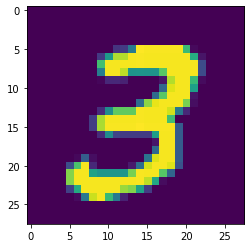

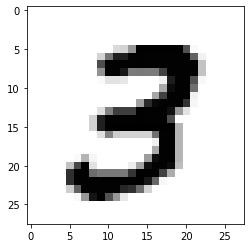

In [ ]:
plt.imshow(x_train[7])
plt.show()
plt.imshow(x_train[7] , cmap=plt.cm.binary)

In [ ]:
print(x_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

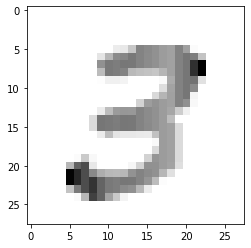

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
plt.imshow(x_train[7] , cmap=plt.cm.binary)

In [ ]:
print(x_train[7])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[7])

3


In [ ]:
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr= np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Deep Learing**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D , MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(32))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
len(x_trainr)

60000

In [ ]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=['accuracy'])

In [ ]:
model.fit(x_trainr , y_train , epochs=5 , validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 97s 71ms/step - loss: 0.3178 - accuracy: 0.8994 - val_loss: 0.1857 - val_accuracy: 0.9429
Epoch 2/5
1313/1313 [==============================] - 80s 61ms/step - loss: 0.1101 - accuracy: 0.9659 - val_loss: 0.1211 - val_accuracy: 0.9621
Epoch 3/5
1313/1313 [==============================] - 81s 61ms/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.0810 - val_accuracy: 0.9751
Epoch 4/5
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.0700 - val_accuracy: 0.9779
Epoch 5/5
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0746 - val_accuracy: 0.9787


In [ ]:
loss , accuracy = model.evaluate(x_testr , y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0720 - accuracy: 0.9795


In [ ]:
print(loss)
print(accuracy)

0.07196422666311264
0.9794999957084656


In [ ]:
predict = model.predict([x_testr])

313/313 [==============================] - 4s 13ms/step


In [ ]:
np.argmax(predict[7])

9

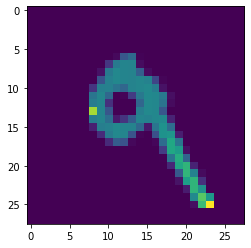

In [ ]:
plt.imshow(x_test[7])